  #                                       Feature Transfrom

In [1]:
import matplotlib.pyplot as plt
import cv2
from bs4 import BeautifulSoup
import keras

Using TensorFlow backend.


In [2]:
cv2.__version__

'3.4.2'

In [3]:
# import image read with help of opencv 
pcock = cv2.imread(r"C:\Users\immur\OneDrive\Pictures\ds\deer.jpg")

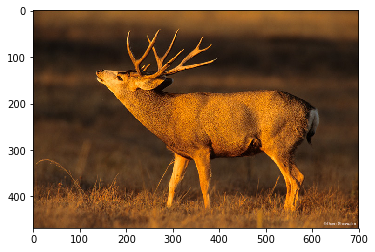

In [4]:
#plt the image convert bgr to rgb
plt.imshow(cv2.cvtColor(pcock , cv2.COLOR_BGR2RGB))

In [5]:
import cv2

In [6]:
dir(cv2.xfeatures2d)

['BoostDesc_create',
 'BriefDescriptorExtractor_create',
 'DAISY_NRM_FULL',
 'DAISY_NRM_NONE',
 'DAISY_NRM_PARTIAL',
 'DAISY_NRM_SIFT',
 'DAISY_create',
 'FREAK_NB_ORIENPAIRS',
 'FREAK_NB_PAIRS',
 'FREAK_NB_SCALES',
 'FREAK_create',
 'HarrisLaplaceFeatureDetector_create',
 'LATCH_create',
 'LUCID_create',
 'PCTSIGNATURES_GAUSSIAN',
 'PCTSIGNATURES_HEURISTIC',
 'PCTSIGNATURES_L0_25',
 'PCTSIGNATURES_L0_5',
 'PCTSIGNATURES_L1',
 'PCTSIGNATURES_L2',
 'PCTSIGNATURES_L2SQUARED',
 'PCTSIGNATURES_L5',
 'PCTSIGNATURES_L_INFINITY',
 'PCTSIGNATURES_MINUS',
 'PCTSIGNATURES_NORMAL',
 'PCTSIGNATURES_REGULAR',
 'PCTSIGNATURES_UNIFORM',
 'PCTSignaturesSQFD_create',
 'PCTSignatures_GAUSSIAN',
 'PCTSignatures_HEURISTIC',
 'PCTSignatures_L0_25',
 'PCTSignatures_L0_5',
 'PCTSignatures_L1',
 'PCTSignatures_L2',
 'PCTSignatures_L2SQUARED',
 'PCTSignatures_L5',
 'PCTSignatures_L_INFINITY',
 'PCTSignatures_MINUS',
 'PCTSignatures_NORMAL',
 'PCTSignatures_REGULAR',
 'PCTSignatures_UNIFORM',
 'PCTSignatures_cr

(468, 700, 3)=>(468, 700)


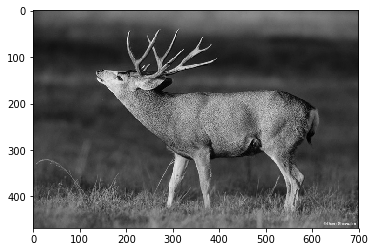

In [7]:
gray = cv2.cvtColor(pcock , cv2.COLOR_BGR2GRAY)
print(str(pcock.shape) + "=>" + str(gray.shape))
plt.imshow(gray , cmap='gray')

#                                   SIFT Feature Transform

In [8]:
import cv2

#SIFT feature detector
sift = cv2.xfeatures2d.SIFT_create()

In [9]:
import time
start_time = time.time()
kp = sift.detect(pcock , None)
print('Elapsed time:%.6fs' % (time.time() - start_time))

Elapsed time:1.422206s


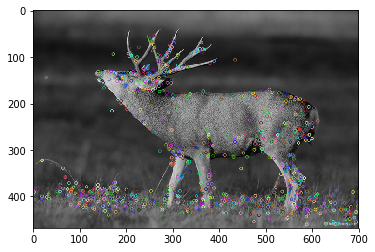

In [10]:
pcock_sift = cv2.drawKeypoints(gray , kp , None)
plt.imshow(cv2.cvtColor(pcock_sift , cv2.COLOR_BGR2RGB))

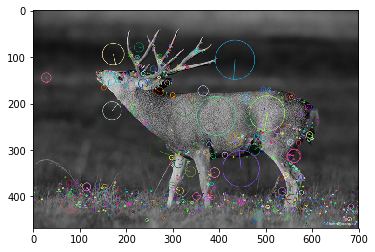

In [11]:
# select rich features 
pcock_sift2 = cv2.drawKeypoints(gray , kp , None , flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(pcock_sift2 , cv2.COLOR_BGR2RGB))

In [16]:
print(type(kp[1]))
print(kp[1])
dir(kp[1])

<class 'cv2.KeyPoint'>
<KeyPoint 000001AF4725E4B0>


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'angle',
 'class_id',
 'convert',
 'octave',
 'overlap',
 'pt',
 'response',
 'size']

In [23]:
print(kp[1].size)
print(kp[1].response)
print(kp[1].pt)
print(kp[1].octave)
print(kp[1].convert)
print(kp[1].angle)
print(kp[1].class_id)

2.62782883644104
0.021254608407616615
(3.1070563793182373, 406.15625)
10814207
<built-in method convert of type object at 0x00007FFD41AEADF0>
0.54888916015625
-1


#                                          Feature Matching

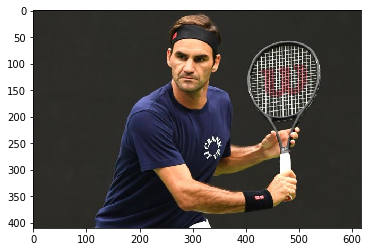

In [44]:
federer = cv2.imread(r"C:\Users\immur\OneDrive\Pictures\ds\federer.jpg")
plt.imshow(cv2.cvtColor(federer , cv2.COLOR_BGR2RGB))

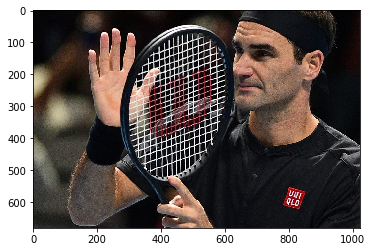

In [46]:
roger = cv2.imread(r"C:\Users\immur\OneDrive\Pictures\ds\roger.jpg")
plt.imshow(cv2.cvtColor(roger , cv2.COLOR_BGR2RGB))

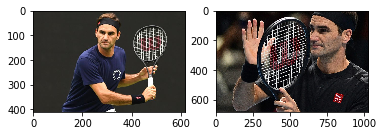

In [72]:
plt.subplot(1 ,2 , 2)
plt.imshow(cv2.cvtColor(roger , cv2.COLOR_BGR2RGB))
plt.subplot(1,2 ,1)
plt.imshow(cv2.cvtColor(federer , cv2.COLOR_BGR2RGB))

In [58]:
# SIFT feature extracting 
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(roger , cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(federer , cv2.COLOR_BGR2GRAY)

In [60]:
start_time = time.time()
kp1 , des1 = sift.detectAndCompute(gray1 , None)
kp2 , des2 = sift.detectAndCompute(gray2 , None)
print('Elapsed time : %.6fs' % (time.time() - start_time))


Elapsed time : 0.512631s


In [61]:
#detecting the features
print('image1: %d feature detected' % des1.shape[0])
print('image2: %d feature detected' % des2.shape[0])

image1: 4662 feature detected
image2: 1463 feature detected


In [62]:
# brute force matcher 
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1 , des2 , k=2)
print("matches %d" % len(matches))

matches 4662


In [63]:
print(dir(matches[0]))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [69]:
# apply david rowe's 
best_matches = []
for m , n in matches:
    if m.distance < 0.75 * n.distance:
        best_matches.append(m)
print("%d matches" % len(best_matches))

73 matches


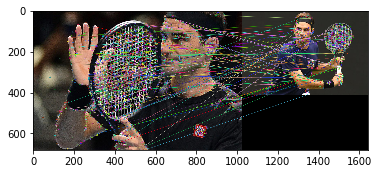

In [73]:
# display matches
rogerfederer = cv2.drawMatches(rojer , kp1 , federer , kp2 , best_matches , None)
plt.imshow(cv2.cvtColor(rogerfederer , cv2.COLOR_BGR2RGB))